# Neural Network Classification
Dataset (From Kaggle)

Name: Student's first name (Pakistani names).

Age: Age of the student (some outliers and missing values).

Gender: Gender (Male/Female).

Admission Test Score: Score obtained in the admission test (includes outliers and 
missing values).

High School Percentage: Student's high school final score percentage (includes outliers and missing values).

City: City of residence in Pakistan.

Admission Status: Whether the student was accepted or rejected.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


2024-12-01 18:00:24.178872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733104824.195582    1193 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733104824.200213    1193 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 18:00:24.219890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data Analysis and Visualization

In [2]:
students = pd.read_csv('student_admission_record_dirty.csv')
display(students)
display(students.info())
display(students.isna().sum())

students.drop_duplicates(inplace=True)
students.drop('Name', axis=1, inplace=True)
display(students)


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


None

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,24.0,Female,50.0,68.90,Quetta,Rejected
1,21.0,Female,99.0,60.73,Karachi,NaN
2,17.0,Male,89.0,NaN,Islamabad,Accepted
3,17.0,Male,55.0,85.29,Karachi,Rejected
4,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...
152,19.0,Female,85.0,78.09,Quetta,Accepted
153,17.0,Female,81.0,84.40,Islamabad,Rejected
154,21.0,Female,98.0,50.86,Multan,Accepted
155,-1.0,Male,91.0,80.12,Quetta,Accepted


In [3]:
students[students['Age'] < 0]

,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
23,-1.0,Male,101.0,54.59,NaN,NaN
50,-1.0,Female,61.0,69.48,Quetta,Rejected
89,-1.0,Male,66.0,79.07,Rawalpindi,Rejected
113,-1.0,Female,84.0,58.77,Quetta,Rejected
155,-1.0,Male,91.0,80.12,Quetta,Accepted


Text(0.5, 1.0, 'High School Percentage by Gender (With Outliers)')

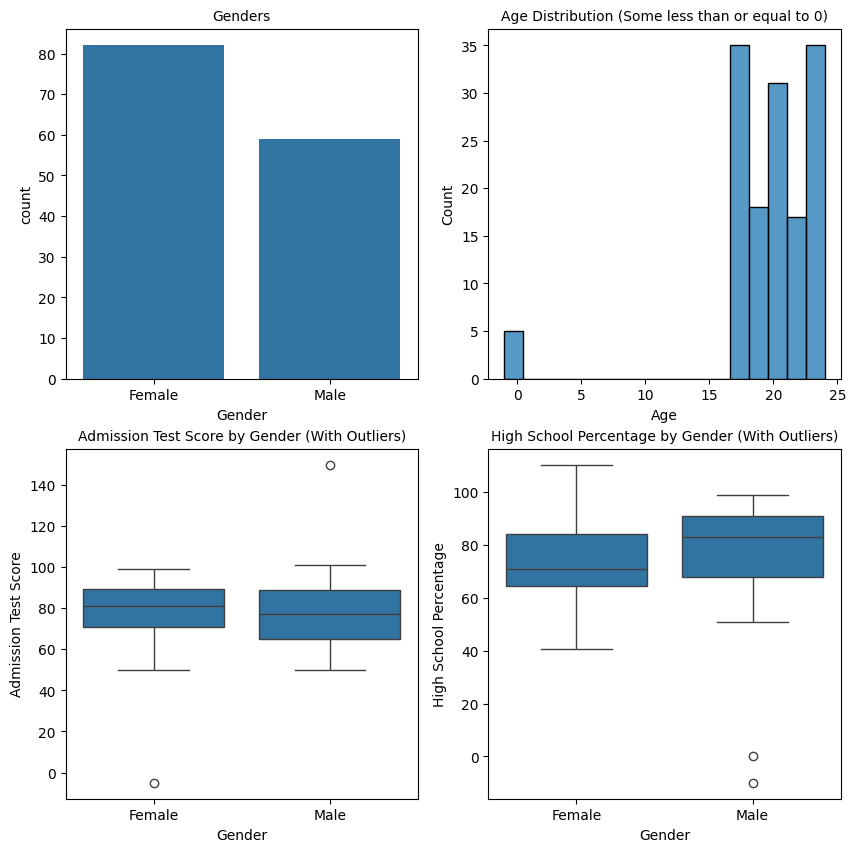

In [4]:
figure, [[axis1,axis2], [axis3,axis4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(students, x="Gender", ax=axis1)
axis1.set_title("Genders", fontsize=10)

sns.boxplot(students, x="Gender", y="Admission Test Score", ax=axis3)
axis3.set_title("Admission Test Score by Gender (With Outliers)", fontsize=10)

sns.histplot(students, x="Age", ax=axis2)
axis2.set_title("Age Distribution (Some less than or equal to 0)", fontsize=10)

sns.boxplot(students, x="Gender", y="High School Percentage", ax=axis4)
axis4.set_title("High School Percentage by Gender (With Outliers)", fontsize=10)

<Axes: xlabel='City', ylabel='count'>

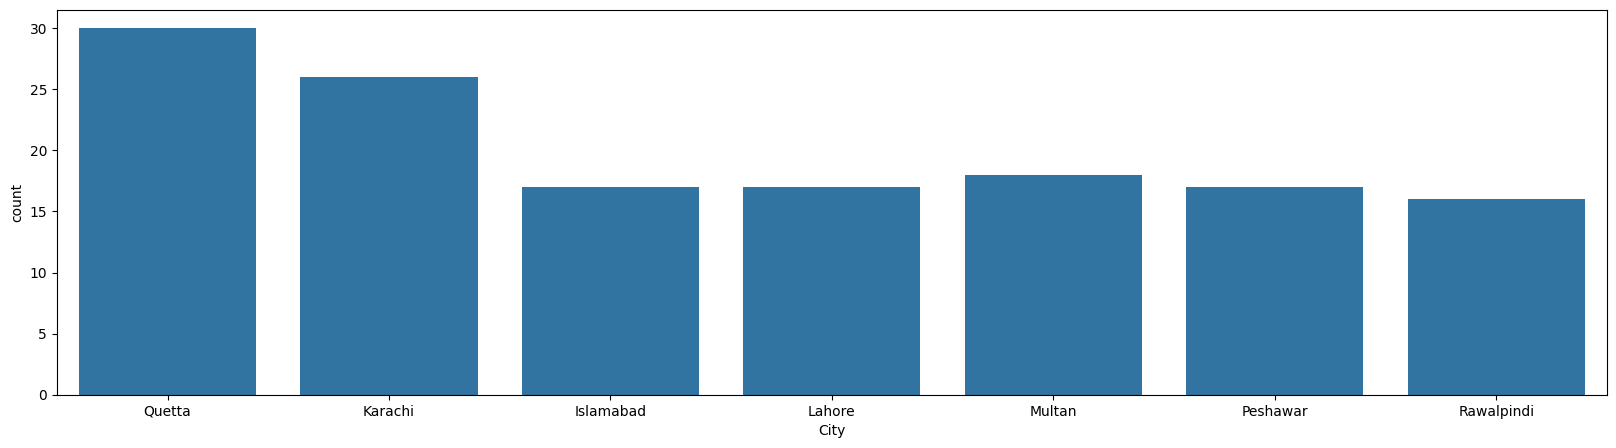

In [5]:
plt.subplots(1,1,figsize=(20,5))

sns.countplot(students, x="City")

In [6]:
def IQR(x):
    """ Calculate IQR Fences"""
    
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    upp = max(x[x < upper])
    low = min(x[x > lower])
    return low, upp

In [7]:
low, upp = IQR(students["Admission Test Score"])
students["Admission Test Score"] = students["Admission Test Score"].clip(low, upp)

low, upp = IQR(students["High School Percentage"])
students["High School Percentage"] = students["High School Percentage"].clip(low, upp)

In [8]:
students = students.fillna({
    "Admission Test Score": students["Admission Test Score"].mean(),
    "High School Percentage": students["High School Percentage"].mean()
})

In [9]:
low, upp = IQR(students["Age"])
students["Age"] = students["Age"].clip(low, upp)

students.Age = students.Age.fillna(students.Age.mean())

Text(0.5, 1.0, 'High School Percentage by Gender (Cleaned)')

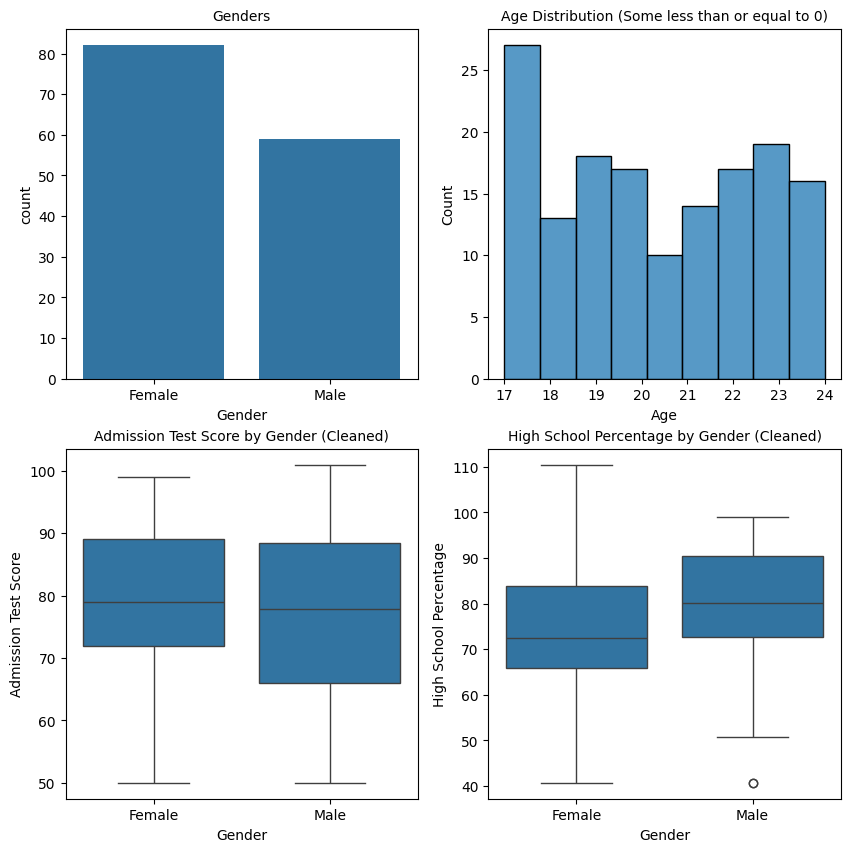

In [10]:
figure, [[axis1,axis2], [axis3,axis4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(students, x="Gender", ax=axis1)
axis1.set_title("Genders", fontsize=10)

sns.boxplot(students, x="Gender", y="Admission Test Score", ax=axis3)
axis3.set_title("Admission Test Score by Gender (Cleaned)", fontsize=10)

sns.histplot(students, x="Age", ax=axis2)
axis2.set_title("Age Distribution (Some less than or equal to 0)", fontsize=10)

sns.boxplot(students, x="Gender", y="High School Percentage", ax=axis4)
axis4.set_title("High School Percentage by Gender (Cleaned)", fontsize=10)

In [11]:
students = students.fillna({"Gender": "Unknown"})

students = students[students["Admission Status"].notna()]
display(students)

,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,24.0,Female,50.0,68.900000,Quetta,Rejected
2,17.0,Male,89.0,75.818786,Islamabad,Accepted
3,17.0,Male,55.0,85.290000,Karachi,Rejected
5,23.0,Female,77.9,75.818786,Islamabad,Accepted
6,18.0,Male,77.9,97.310000,Multan,Accepted
...,...,...,...,...,...,...
152,19.0,Female,85.0,78.090000,Quetta,Accepted
153,17.0,Female,81.0,84.400000,Islamabad,Rejected
154,21.0,Female,98.0,50.860000,Multan,Accepted
155,17.0,Male,91.0,80.120000,Quetta,Accepted


Model Set up

In [16]:
students.drop("City", axis=1, inplace=True)

le = LabelEncoder()
students.Gender = le.fit_transform(students.Gender)
students["Admission Status"] = le.fit_transform(students["Admission Status"])

display(students)

X = students.iloc[:, :-1].values
y = students.iloc[:, -1].values


,Age,Gender,Admission Test Score,High School Percentage,Admission Status
0,24.0,0,50.0,68.900000,1
2,17.0,1,89.0,75.818786,0
3,17.0,1,55.0,85.290000,1
5,23.0,0,77.9,75.818786,0
6,18.0,1,77.9,97.310000,0
...,...,...,...,...,...
152,19.0,0,85.0,78.090000,0
153,17.0,0,81.0,84.400000,1
154,21.0,0,98.0,50.860000,0
155,17.0,1,91.0,80.120000,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



The ANN

In [18]:
ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training ANN

In [21]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7019 - loss: 0.5333  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7082 - loss: 0.5434 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6832 - loss: 0.5430 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6915 - loss: 0.5360 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6957 - loss: 0.5401 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7249 - loss: 0.5285 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7103 - loss: 0.5156 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7228 - loss: 0.5127 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6801 - loss: 0.5334 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7420 - loss: 0.5116 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7034 - loss: 0.5244 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7347 - lo

Analysis

In [22]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), '\n\n\n')

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]] 



[[ 4  7]
 [ 8 10]]


0.4827586206896552

Regression ANN

Dataset (From Kaggle)

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [24]:
medical = pd.read_csv('insurance.csv')
display(medical)
display(medical.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [36]:
medical.sex = le.fit_transform(medical.sex)
medical.smoker = le.fit_transform(medical.smoker)
medical.region = le.fit_transform(medical.region)

In [39]:
X = medical.iloc[:,:-1].values
y = medical.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train.reshape(-1,1))


ANN Regression

In [40]:
rann = tf.keras.models.Sequential()

rann.add(tf.keras.layers.Dense(units=6, activation='relu'))

rann.add(tf.keras.layers.Dense(units=6, activation='relu'))

rann.add(tf.keras.layers.Dense(units=1))


Compile

In [43]:
rann.compile(optimizer = 'adam', loss = 'mean_squared_error')

rann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2781  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5752
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2967 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0628 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9239 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8453
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6726 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5946 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5268
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5204 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4169 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3558 
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3628 
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3436 
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [46]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
import math

y_pred = sc.inverse_transform(rann.predict(X_test))
np.set_printoptions(precision=2)

maxY=max(y_test)
minY=min(y_test)
a=maxY-minY
print(a)

# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print ("The R-Squared value is: "+str(r2_score(y_test, y_pred)))
print ("The Mean Squared Error value is: "+str(mean_squared_error(y_test, y_pred)))
print ("The Root Mean Squared Error value is: "+str(math.sqrt(mean_squared_error(y_test, y_pred))))
print ("The Normalize Root Mean Squared Error value is: "+str(math.sqrt(mean_squared_error(y_test, y_pred))/(a)*100))
print ("The Mean Absolute Error value is: "+str(mean_absolute_percentage_error(y_test, y_pred)*100))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
51459.32279
The R-Squared value is: 0.8834929622899913
The Mean Squared Error value is: 18539760.521056157
The Root Mean Squared Error value is: 4305.782219417995
The Normalize Root Mean Squared Error value is: 8.367351115344897
The Mean Absolute Error value is: 32.215293358848776
